In [ ]:
# https://www.kaggle.com/naturebalance/starter-on-cats-dogs-case-fine-tuning-vgg16
# https://www.kaggle.com/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning

In [1]:
import numpy as np 
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/home/cslab/Desktop/2nd_ML/data"))

['train', 'test']


In [2]:
filenames = os.listdir("/home/cslab/Desktop/2nd_ML/data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [3]:
df.head(5)

,category,filename
0,0,dog.12097.jpg
1,0,dog.7536.jpg
2,1,cat.3501.jpg
3,1,cat.12182.jpg
4,0,dog.1021.jpg


In [4]:
df.category=df.category.astype('str')
df.dtypes

category    object
filename    object
dtype: object

In [5]:
print(df.head())
df.category.value_counts()

  category       filename
0        0  dog.12097.jpg
1        0   dog.7536.jpg
2        1   cat.3501.jpg
3        1  cat.12182.jpg
4        0   dog.1021.jpg


0    12500
1    12500
Name: category, dtype: int64

Using TensorFlow backend.


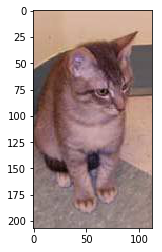

In [6]:
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import matplotlib.pyplot as plt
%matplotlib inline

sample = random.choice(filenames)
image = load_img("/home/cslab/Desktop/2nd_ML/data/train/"+sample)
plt.imshow(image)

In [7]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [8]:
train_df['category'].value_counts()
validate_df['category'].value_counts()

1    2541
0    2459
Name: category, dtype: int64

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/home/cslab/Desktop/2nd_ML/data/train/", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/home/cslab/Desktop/2nd_ML/data/train/", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


In [11]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(150, 150, 3))

from keras import models 
from keras import layers
model = models.Sequential() 
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
#fine tuning last 4 layers
conv_base.trainable=True
len(conv_base.layers)


19

In [13]:
for i in range(0,15):
    conv_base.layers[i].trainable=False

for i in range(15,19):
    conv_base.layers[i].trainable=True

In [14]:
for i in range(0,19):
    print(conv_base.layers[i].trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [15]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5), 
              metrics=['acc'])

In [16]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=100, 
    epochs=100,
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 127ms/step - loss: 0.5096 - acc: 0.7527 - val_loss: 0.3380 - val_acc: 0.8627
Epoch 2/100
100/100 [==============================] - 11s 106ms/step - loss: 0.3567 - acc: 0.8300 - val_loss: 0.2562 - val_acc: 0.8867
Epoch 3/100
100/100 [==============================] - 11s 106ms/step - loss: 0.3061 - acc: 0.8753 - val_loss: 0.2734 - val_acc: 0.8853
Epoch 4/100
100/100 [==============================] - 11s 106ms/step - loss: 0.2522 - acc: 0.9033 - val_loss: 0.2188 - val_acc: 0.9133
Epoch 5/100
100/100 [==============================] - 11s 106ms/step - loss: 0.2730 - acc: 0.8840 - val_loss: 0.2637 - val_acc: 0.8947
Epoch 6/100
100/100 [==============================] - 11s 106ms/step - loss: 0.2407 - acc: 0.8987 - val_loss: 0.2148 - val_acc: 0.9147
Epoch 7/100
100/100 [==============================] - 11s 110ms/step - loss: 0.2511 - acc: 0.8953 - val_loss: 0.2284 - val_acc: 0.8973
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 10s 104ms/step - loss: 0.1202 - acc: 0.9473 - val_loss: 0.0954 - val_acc: 0.9581
Epoch 62/100
100/100 [==============================] - 10s 102ms/step - loss: 0.1374 - acc: 0.9467 - val_loss: 0.1687 - val_acc: 0.9347
Epoch 63/100
100/100 [==============================] - 10s 103ms/step - loss: 0.1144 - acc: 0.9533 - val_loss: 0.1331 - val_acc: 0.9600
Epoch 64/100
100/100 [==============================] - 10s 102ms/step - loss: 0.1189 - acc: 0.9533 - val_loss: 0.1020 - val_acc: 0.9587
Epoch 65/100
100/100 [==============================] - 10s 103ms/step - loss: 0.1204 - acc: 0.9500 - val_loss: 0.1147 - val_acc: 0.9560
Epoch 66/100
100/100 [==============================] - 10s 103ms/step - loss: 0.1262 - acc: 0.9540 - val_loss: 0.1316 - val_acc: 0.9560
Epoch 67/100
100/100 [==============================] - 11s 105ms/step - loss: 0.1175 - acc: 0.9527 - val_loss: 0.1441 - val_acc: 0.9514
Epoch 68/100
100/100 [===================

In [28]:
loss, accuracy = model.evaluate_generator(validation_generator, train_generator.samples // 15)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.955973  ;  loss = 0.121235 


In [18]:
model.save('model-VGG160818.h5')

In [29]:
test_filenames = os.listdir("/home/cslab/Desktop/2nd_ML/data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
test_df.head()

,filename
0,363.jpg
1,091.jpg
2,194.jpg
3,245.jpg
4,033.jpg


In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/home/cslab/Desktop/2nd_ML/data/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=10,
    shuffle=False
)

Found 400 validated image filenames.


## Predict

In [38]:
predict = model.predict_generator(test_generator)

# predict = model.predict_generator(test_generator, steps=1250)

# predict = net_final.predict_generator(test_generator, steps=np.ceil(nb_samples/BATCH_SIZE))[:,1]

In [34]:
nb_samples

400

In [39]:
len(predict)

400

## Submission

In [40]:
test_df['Predicted'] = predict

In [41]:
test_df.head(10)

,filename,Predicted
0,363.jpg,4.773809e-07
1,091.jpg,2.023630e-08
2,194.jpg,2.198821e-05
3,245.jpg,5.474653e-01
4,033.jpg,9.999430e-01
5,155.jpg,9.608791e-01
6,303.jpg,6.856655e-09
7,224.jpg,1.000000e+00
8,176.jpg,1.369633e-03
9,131.jpg,9.426730e-15


In [42]:
submission_df = test_df.copy()

In [43]:
submission_df['ID'] = submission_df['filename'].str.split('.').str[0]
submission_df.drop(['filename'], axis=1, inplace=True)
# submission_df.to_csv('submission.csv', index=False)

In [44]:
submission_df.sort_values('ID',inplace=True)

In [45]:
submission_df.reset_index(drop=True, inplace=True)

In [46]:
submission_df.head(10)

,Predicted,ID
0,9.405842e-01,000
1,9.989390e-01,001
2,1.000000e+00,002
3,1.618458e-08,003
4,9.999977e-01,004
5,9.999292e-01,005
6,4.593450e-08,006
7,9.987398e-01,007
8,9.994253e-01,008
9,9.999994e-01,009


In [47]:
submission_df = submission_df[['ID','Predicted']]
submission_df.head(10)

,ID,Predicted
0,000,9.405842e-01
1,001,9.989390e-01
2,002,1.000000e+00
3,003,1.618458e-08
4,004,9.999977e-01
5,005,9.999292e-01
6,006,4.593450e-08
7,007,9.987398e-01
8,008,9.994253e-01
9,009,9.999994e-01


In [48]:
submission_df.to_csv('submission.csv', index=False)